In [1]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
nightengale_metadata = pd.read_excel("data/264079_file03.xlsx", engine="openpyxl", sheet_name="Table S1", skiprows=2)
nightengale_metadata = nightengale_metadata.drop(columns=["Biomarker", "Units", "Group", "Sub-group", "UKB Field ID", "QC Flag Field ID"])
nightengale_metadata = nightengale_metadata.rename(columns={"Description": "BIOCHEMICAL"})
annotations = pd.read_excel("data/BioBank.xlsx", engine="openpyxl", sheet_name="Metabolite Annotations")
annotations = annotations.merge(nightengale_metadata, on="BIOCHEMICAL", how="left")
is_nonderived = (annotations['Type'] == "Non-derived").values.tolist()

train_df = pd.read_excel("data/BioBank.xlsx", engine="openpyxl", sheet_name="Training Set")
test_df = pd.read_excel("data/BioBank.xlsx", engine="openpyxl", sheet_name="Testing Set")
df = pd.concat([train_df, test_df])
df = df.rename(columns={id: name for id, name in zip(annotations.COMP_IDstr.values.tolist(), annotations.BIOCHEMICAL.values.tolist())})
del train_df
del test_df
del nightengale_metadata

<Figure size 1500x1000 with 0 Axes>

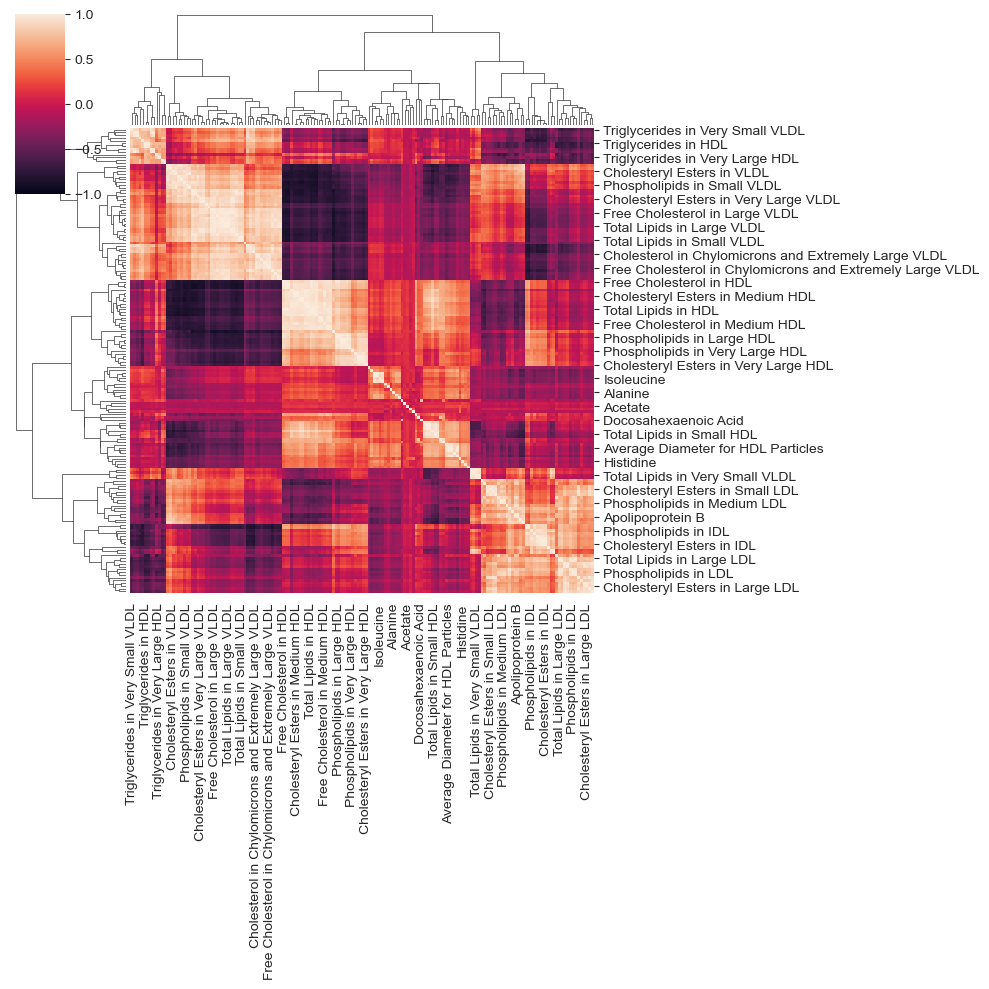

In [12]:
plt.figure(figsize=(15, 10))
sns.clustermap(df.corr(), annot=False, vmin=-1, vmax=1)

<Figure size 1500x1000 with 0 Axes>

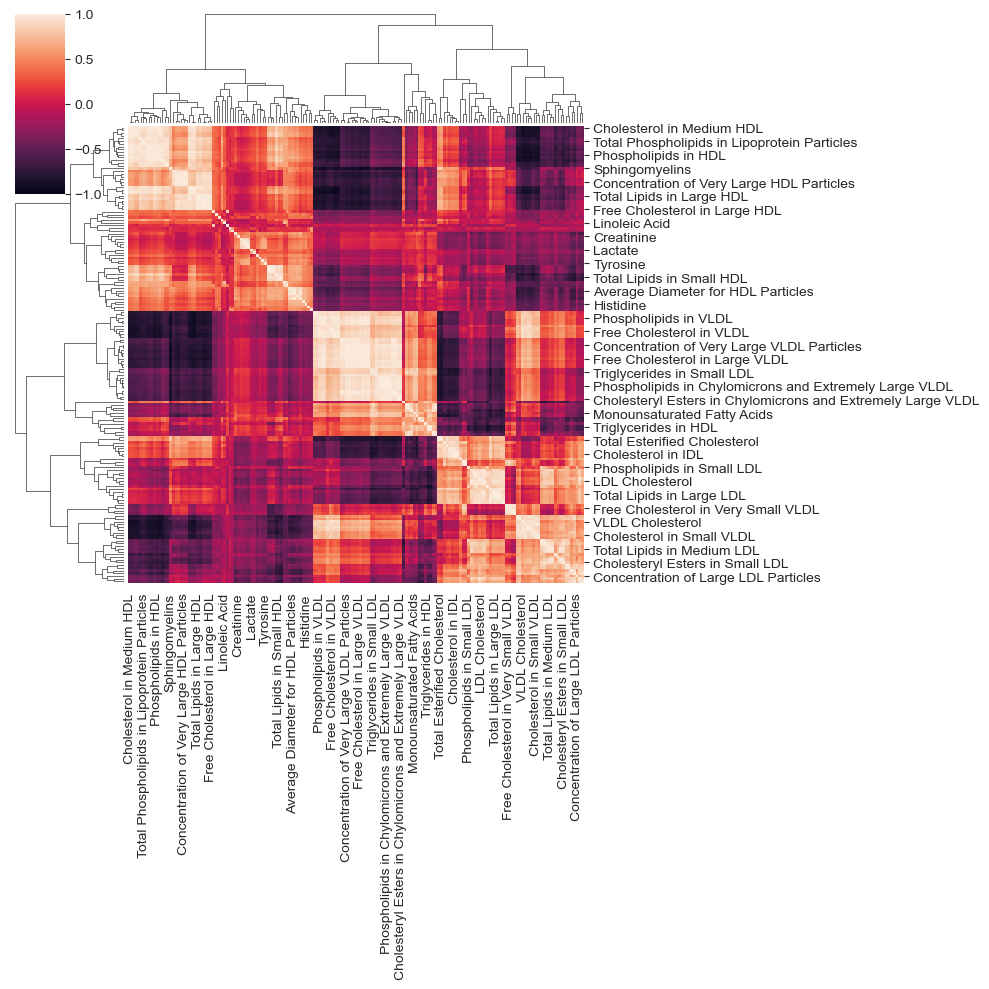

In [13]:
plt.figure(figsize=(15, 10))
sns.clustermap(df.corr('spearman'), annot=False, vmin=-1, vmax=1)

<Figure size 1500x1000 with 0 Axes>

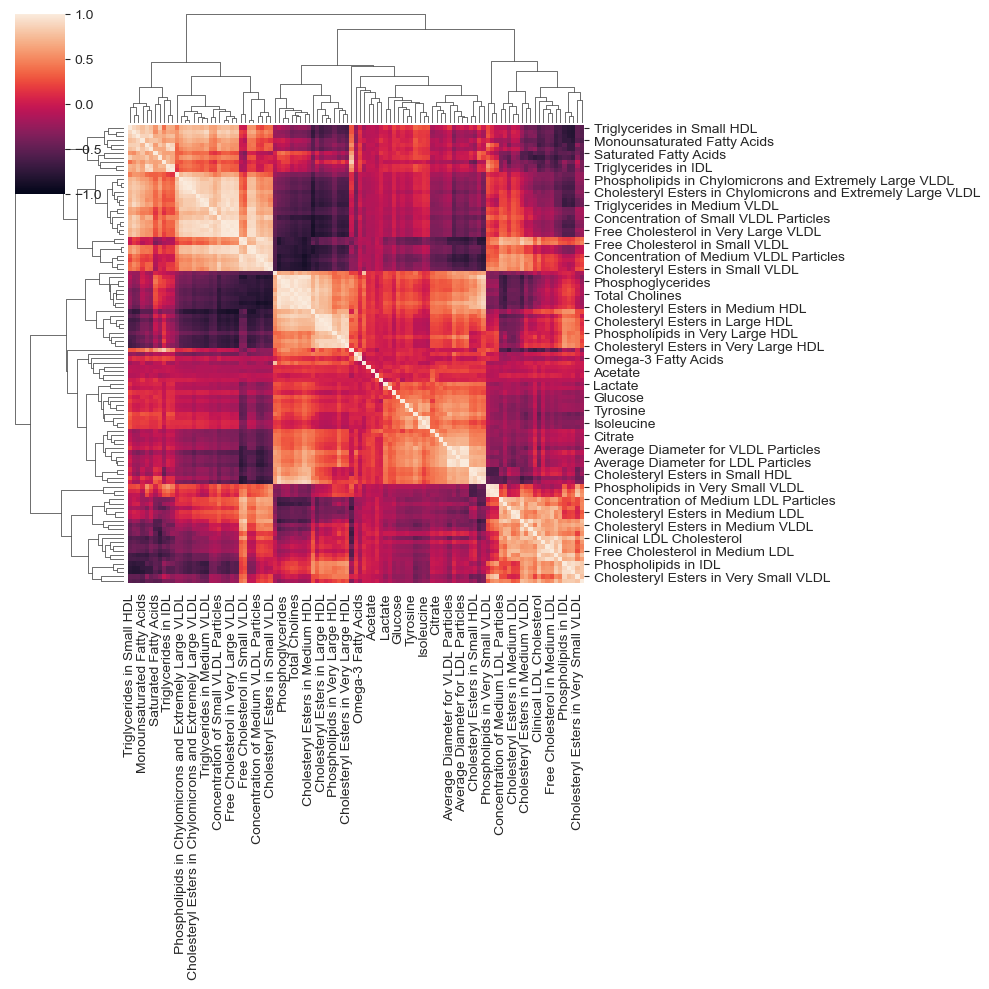

In [14]:
# Correlate without derived features
non_derived_df = df[df.columns[is_nonderived]]
plt.figure(figsize=(15, 10))
sns.clustermap(non_derived_df.corr(), annot=False, vmin=-1, vmax=1)

<Figure size 1500x1000 with 0 Axes>

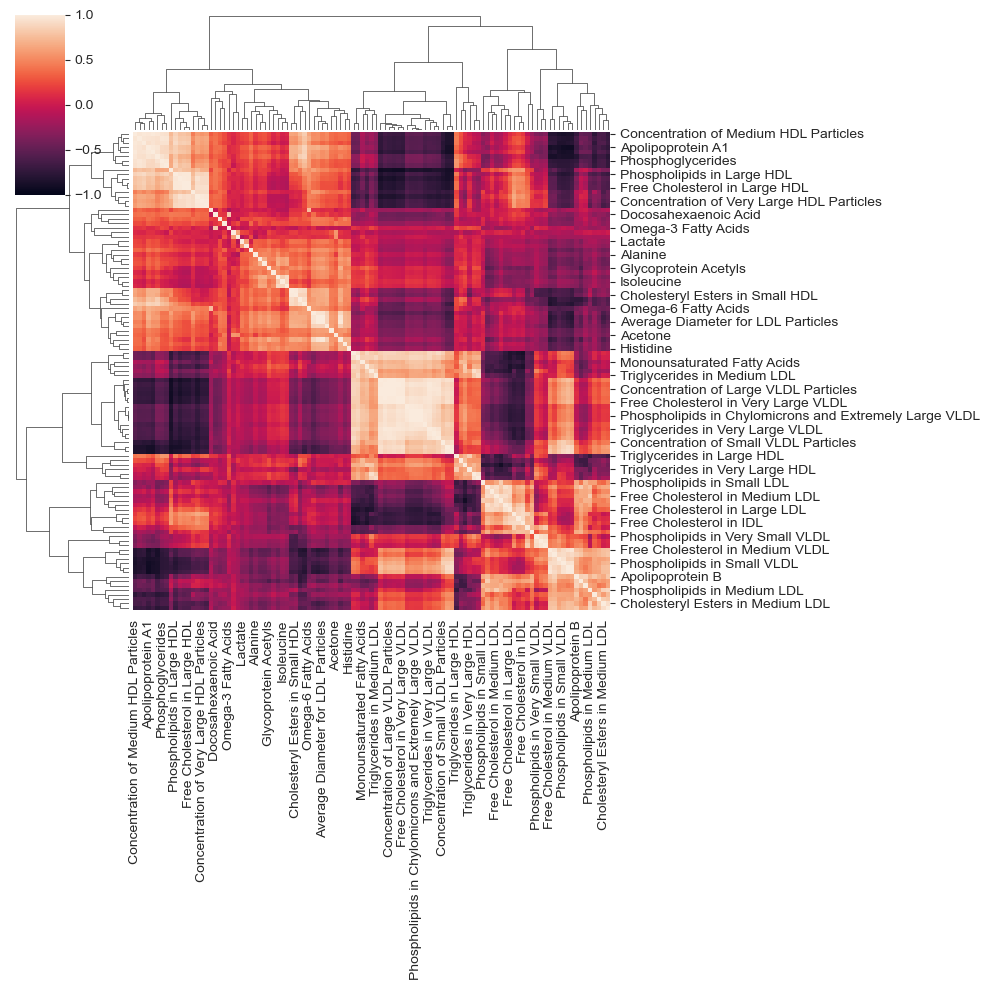

In [15]:
plt.figure(figsize=(15, 10))
sns.clustermap(non_derived_df.corr('spearman'), annot=False, vmin=-1, vmax=1)

<Figure size 1500x1000 with 0 Axes>

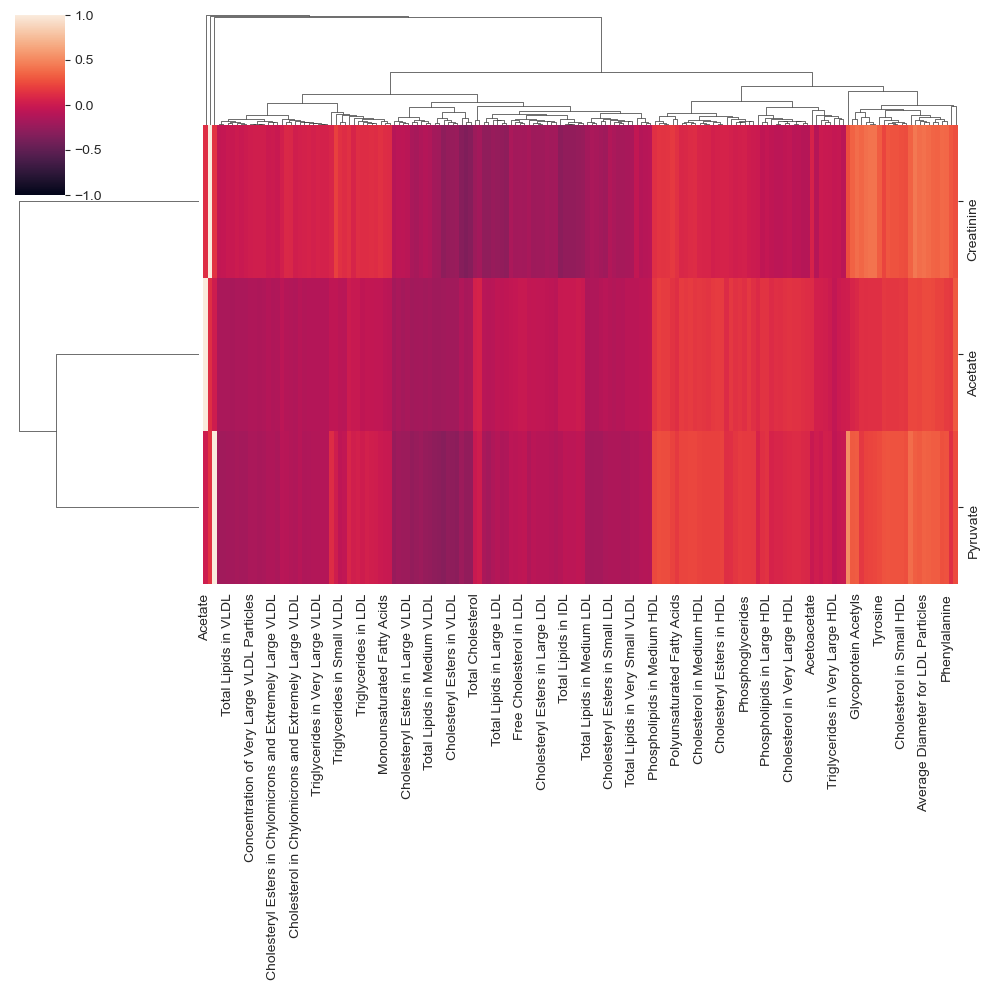

In [16]:
# Examine metabolites that showed poor predicative accuracy
focused_corr = df.corr()
focused_corr = focused_corr.loc[['Acetate', 'Pyruvate', 'Creatinine']]
plt.figure(figsize=(15, 10))
sns.clustermap(focused_corr, annot=False, vmin=-1, vmax=1)

<Figure size 1500x1000 with 0 Axes>

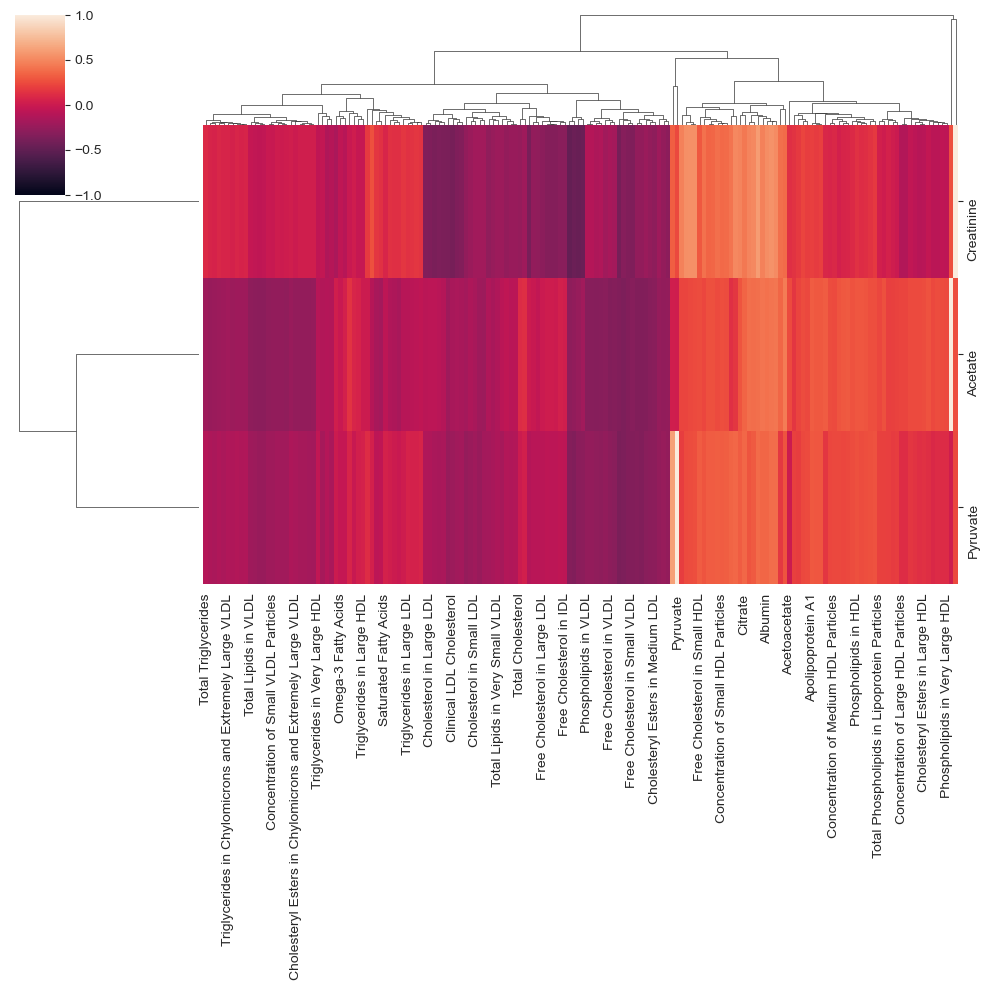

In [17]:
# Examine metabolites that showed poor predicative accuracy
focused_corr = df.corr(method='spearman')
focused_corr = focused_corr.loc[['Acetate', 'Pyruvate', 'Creatinine']]
plt.figure(figsize=(15, 10))
sns.clustermap(focused_corr, annot=False, vmin=-1, vmax=1)